In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [18]:
ejemplo = pd.read_csv("/content/Iris2.csv")

In [4]:
ejemplo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
ejemplo_variables=ejemplo.drop(['Id'], axis =1)

In [6]:
ejemplo_variables.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
Iris2_norm=(ejemplo_variables-ejemplo_variables.min())/(ejemplo_variables.max()-ejemplo_variables.min())
ejemplo_variables

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
Iris2_norm.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [9]:
wcss = []
for i in range(1, 8):
  kmeans =KMeans(n_clusters = i, max_iter =300)
  kmeans.fit(ejemplo_variables)
  wcss.append(kmeans.inertia_)

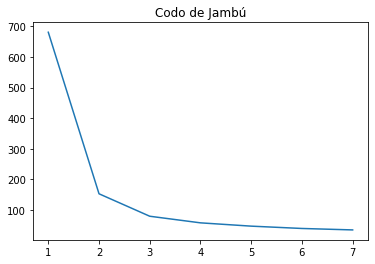

In [17]:
plt.plot(range(1,8),wcss)
plt.title("Codo de Jambú")
plt.xlabel=('numero de clusters')
plt.ylabel=('wcss')
plt.show()

In [16]:
clustering = KMeans(n_clusters=3, max_iter=300)
clustering.fit(ejemplo_variables)

KMeans(n_clusters=3)

In [15]:
ejemplo['KMeans_Clusters']=clustering.labels_
ejemplo.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,KMeans_Clusters
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_ejemplo = pca.fit_transform(ejemplo_variables)
pca_ejemplo_df= pd.DataFrame(data=pca_ejemplo, columns = ['Componente_1', 'Componente_2'])
pca_nombres= pd.concat([pca_ejemplo_df, ejemplo[['KMeans_Clusters']]], axis=1)
pca_nombres

,Componente_1,Componente_2,KMeans_Clusters
0,-2.684207,0.326607,1
1,-2.715391,-0.169557,1
2,-2.889820,-0.137346,1
3,-2.746437,-0.311124,1
4,-2.728593,0.333925,1
...,...,...,...
145,1.944017,0.187415,2
146,1.525664,-0.375021,0
147,1.764046,0.078519,2
148,1.901629,0.115877,2


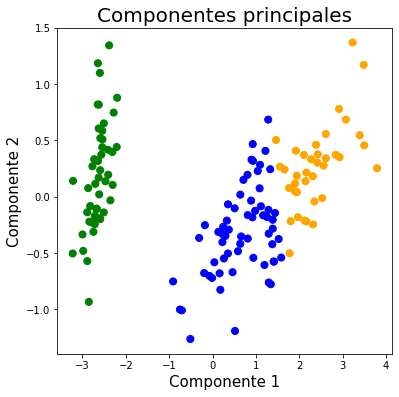

In [22]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes principales', fontsize = 20)

color_theme= np.array(["blue", "green", "orange"])
ax.scatter(x=pca_nombres.Componente_1, y=pca_nombres.Componente_2, c= color_theme[pca_nombres.KMeans_Clusters],
           s= 50)
plt.show()